# Exploratory Data Analysis of Shakesperean English to Modern English Collected Data


In [154]:
from preprocess import tokenize

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords', quiet=True)

print(type(stopwords.words('english')))


<class 'list'>


In [155]:
stopwords_dict = dict()
for word in stopwords.words('english'):
    stopwords_dict[word] = True

print(stopwords_dict)

{'i': True, 'me': True, 'my': True, 'myself': True, 'we': True, 'our': True, 'ours': True, 'ourselves': True, 'you': True, "you're": True, "you've": True, "you'll": True, "you'd": True, 'your': True, 'yours': True, 'yourself': True, 'yourselves': True, 'he': True, 'him': True, 'his': True, 'himself': True, 'she': True, "she's": True, 'her': True, 'hers': True, 'herself': True, 'it': True, "it's": True, 'its': True, 'itself': True, 'they': True, 'them': True, 'their': True, 'theirs': True, 'themselves': True, 'what': True, 'which': True, 'who': True, 'whom': True, 'this': True, 'that': True, "that'll": True, 'these': True, 'those': True, 'am': True, 'is': True, 'are': True, 'was': True, 'were': True, 'be': True, 'been': True, 'being': True, 'have': True, 'has': True, 'had': True, 'having': True, 'do': True, 'does': True, 'did': True, 'doing': True, 'a': True, 'an': True, 'the': True, 'and': True, 'but': True, 'if': True, 'or': True, 'because': True, 'as': True, 'until': True, 'while': T

In [156]:
data = pd.read_csv("cleaned_data.csv")
data.head(10)

,Input,Labels
0,"in saying goodbye to my son , it ' s like i ' ...","in delivering my son from me , i bury a second..."
1,"and for me , in leaving , mother , i mourn my ...","and i in going , madam , weep o ' er my father..."
2,"the king will be like a husband to you , madam...","you shall find of the king a husband , madam ;..."
3,"if he ' s so good to all his subjects , you ca...",he that so generally is at all times good must...
4,your family has been so important to him that ...,whose worthiness would stir it up where it wan...
5,"since he is generous , there ' s no way he won...",where there is such abundance .
6,how likely is it that his majesty will recover ?,what hope is there of his majesty ' s amendment ?
7,"he ' s given up on his doctors , madam .","he hath abandoned his physicians , madam ;"
8,he ' s wasted a lot of time and hope following...,under whose practises he hath persecuted time ...
9,and all he ' s getting out of it is gradually ...,and finds no other advantage in the process bu...


In [157]:
tokenized_input, tokenized_labels = tokenize(data)

In [158]:
print("Sample Tokenized Input-Labels Pair")
print(tokenized_input[0])
print(tokenized_labels[0])

Sample Tokenized Input-Labels Pair
['in', 'saying', 'goodbye', 'to', 'my', 'son', ',', 'it', "'", 's', 'like', 'i', "'", 'm', 'losing', 'another', 'husband', '.', '<eos>']
['in', 'delivering', 'my', 'son', 'from', 'me', ',', 'i', 'bury', 'a', 'second', 'husband', '.', '<eos>']


In [159]:
print("Sample Input Token Length:", len(tokenized_input[0]))
print("Sample Labels Token Length:", len(tokenized_labels[0]))

Sample Input Token Length: 19
Sample Labels Token Length: 14


In [160]:
tokenized_input_len = [len(line) for line in tokenized_input]
tokenized_labels_len = [len(line) for line in tokenized_labels]

data["Tokenized Input Length"] = tokenized_input_len
data["Tokenized Labels Length"] = tokenized_labels_len

data.head(10)


,Input,Labels,Tokenized Input Length,Tokenized Labels Length
0,"in saying goodbye to my son , it ' s like i ' ...","in delivering my son from me , i bury a second...",19,14
1,"and for me , in leaving , mother , i mourn my ...","and i in going , madam , weep o ' er my father...",45,41
2,"the king will be like a husband to you , madam...","you shall find of the king a husband , madam ;...",22,19
3,"if he ' s so good to all his subjects , you ca...",he that so generally is at all times good must...,24,19
4,your family has been so important to him that ...,whose worthiness would stir it up where it wan...,24,14
5,"since he is generous , there ' s no way he won...",where there is such abundance .,21,7
6,how likely is it that his majesty will recover ?,what hope is there of his majesty ' s amendment ?,11,12
7,"he ' s given up on his doctors , madam .","he hath abandoned his physicians , madam ;",12,9
8,he ' s wasted a lot of time and hope following...,under whose practises he hath persecuted time ...,15,11
9,and all he ' s getting out of it is gradually ...,and finds no other advantage in the process bu...,17,18


In [169]:
def get_tokenzied_info(tokenized_list):
    num_words = 0
    sum_of_word_lengths = 0

    num_words_line = []
    avg_wd_len_list = []
    tokenized_no_punc_no_stop = []

    for line in tokenized_list:
        tokenized_line = []
        for token in line:
            if token != "\'" and token != "\"" and token !="." and token !="," and token !="!" and token != "?" and token != "-" and token != ";" and token != ":" and token not in stopwords_dict:
                num_words += 1
                sum_of_word_lengths += len(token)
                tokenized_line.append(token)

        num_words_line.append(num_words)

        tokenized_no_punc_no_stop.append(tokenized_line)

        avg_wd_len = sum_of_word_lengths / num_words
        avg_wd_len_list.append(avg_wd_len)

        num_words = 0
        sum_of_word_lengths = 0
    
    return num_words_line, avg_wd_len_list, tokenized_no_punc_no_stop

In [170]:
input_num_words_line, avg_wd_len_in, token_input_cleaned = get_tokenzied_info(tokenized_input)
label_num_words_line, avg_wd_len_label, token_labels_cleaned = get_tokenzied_info(tokenized_labels)

data["Input Number of Words"] = input_num_words_line
data["Labels Number of Words"] = label_num_words_line
data["Average Word Length Input"] = avg_wd_len_in
data["Average Word Length Labels"] = avg_wd_len_label

data.head(10)

,Input,Labels,Tokenized Input Length,Tokenized Labels Length,Input Number of Words,Labels Number of Words,Average Word Length Input,Average Word Length Labels
0,"in saying goodbye to my son , it ' s like i ' ...","in delivering my son from me , i bury a second...",19,14,8,6,5.625000,5.833333
1,"and for me , in leaving , mother , i mourn my ...","and i in going , madam , weep o ' er my father...",45,41,14,15,6.000000,5.466667
2,"the king will be like a husband to you , madam...","you shall find of the king a husband , madam ;...",22,19,8,8,4.750000,4.875000
3,"if he ' s so good to all his subjects , you ca...",he that so generally is at all times good must...,24,19,5,8,5.000000,5.750000
4,your family has been so important to him that ...,whose worthiness would stir it up where it wan...,24,14,7,8,6.857143,5.625000
5,"since he is generous , there ' s no way he won...",where there is such abundance .,21,7,6,2,5.666667,7.000000
6,how likely is it that his majesty will recover ?,what hope is there of his majesty ' s amendment ?,11,12,4,4,6.250000,6.250000
7,"he ' s given up on his doctors , madam .","he hath abandoned his physicians , madam ;",12,9,4,5,5.500000,6.600000
8,he ' s wasted a lot of time and hope following...,under whose practises he hath persecuted time ...,15,11,7,7,5.285714,5.857143
9,and all he ' s getting out of it is gradually ...,and finds no other advantage in the process bu...,17,18,6,7,5.833333,5.714286


In [171]:
def make_box_and_hist(input_df, labels_list, axis_titles, plot_titles, bin_width=20):
    """
    *Purpose: Plots a box plot and histogram

    Parameters:
        -Input df is a dataframe consisting of a subset of columns from the 
        global larger main dataframe
        - labels_list is a 2D list where each outer index represents the x-axis
        labels for one of the two plots.
        -Plot titles is a list of titles of size 2, one for each plot
        -axis_titles is a list of pairs (x_title y_title) for each plot
    
    Returns: Nothing
    """
    plt.subplot(1,2,1)
    sns.boxplot(data=input_df, fill=False)

    plt.xticks(ticks=np.arange(2), labels=labels_list, rotation=25,  ha="right")
    plt.ylabel(axis_titles[0][1], labelpad=12.5)

    plt.title(plot_titles[0])
    print("after first plot")


    plt.subplot(1,2,2)
    sns.histplot(data=input_df, multiple="dodge", kde=True, binwidth=bin_width)
    
    plt.legend(loc='upper right', labels=['Labels', 'Input'])

    plt.xlabel(axis_titles[1][0])
    plt.ylabel(axis_titles[1][1])

    plt.title(plot_titles[1])

    print("after second plot")

    plt.tight_layout()
    plt.show()


after first plot
after second plot


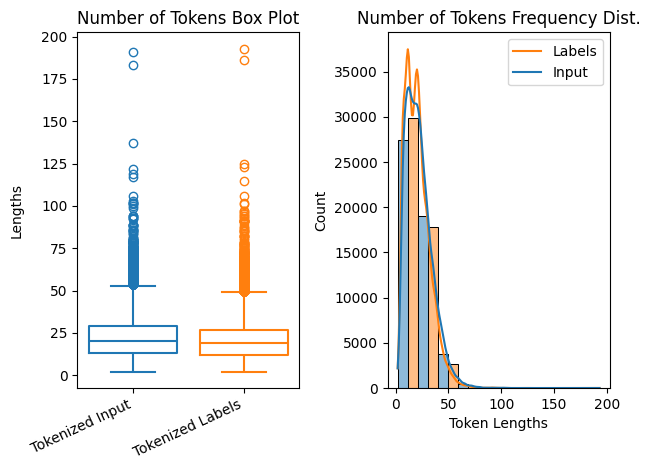

In [172]:
new_df = pd.DataFrame([data["Tokenized Input Length"], data["Tokenized Labels Length"]]).transpose()
make_box_and_hist(new_df, ["Tokenized Input", "Tokenized Labels"], [("", "Lengths"),("Token Lengths", "Count")], ["Number of Tokens Box Plot", "Number of Tokens Frequency Dist."])

after first plot
after second plot


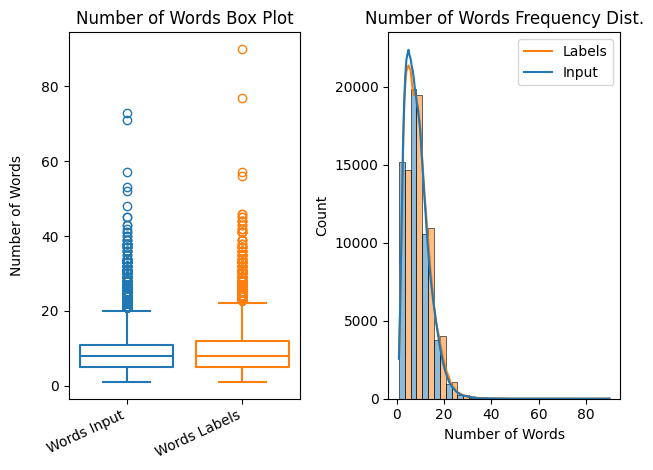

In [177]:
new_df = pd.DataFrame([data["Input Number of Words"], data["Labels Number of Words"]]).transpose()
make_box_and_hist(new_df, ["Words Input", "Words Labels"], [("", "Number of Words"),("Number of Words", "Count")], ["Number of Words Box Plot", "Number of Words Frequency Dist."], 5)

after first plot
after second plot


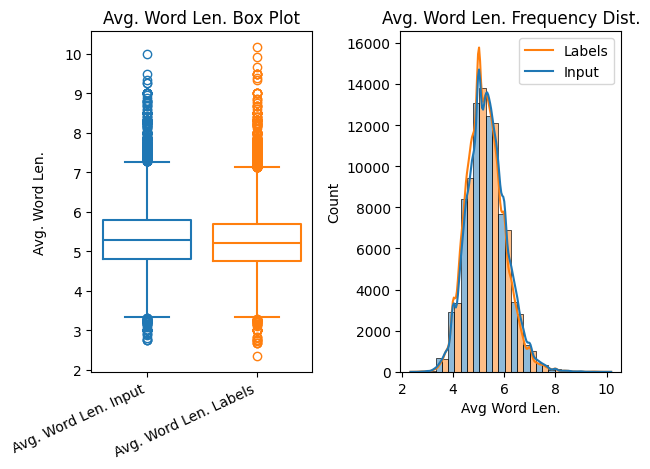

In [178]:
new_df = pd.DataFrame([data["Average Word Length Input"], data["Average Word Length Labels"]]).transpose()
make_box_and_hist(new_df, ["Avg. Word Len. Input", "Avg. Word Len. Labels"], [("", "Avg. Word Len."), ("Avg Word Len.", "Count")], ["Avg. Word Len. Box Plot", "Avg. Word Len. Frequency Dist."], 0.5)

## Term Frequency Analysis

In [179]:
print(tokenized_input[:5])
print(tokenized_labels[:5])
print(token_input_cleaned[:5])
print(token_labels_cleaned[:5])


[['in', 'saying', 'goodbye', 'to', 'my', 'son', ',', 'it', "'", 's', 'like', 'i', "'", 'm', 'losing', 'another', 'husband', '.', '<eos>'], ['and', 'for', 'me', ',', 'in', 'leaving', ',', 'mother', ',', 'i', 'mourn', 'my', 'father', "'", 's', 'death', 'all', 'over', 'again', ',', 'but', 'i', 'must', 'serve', 'at', 'the', 'king', "'", 's', 'command', ',', 'since', 'i', 'am', 'now', 'his', 'subject', 'and', 'eternally', 'in', 'servitude', 'to', 'him', '.', '<eos>'], ['the', 'king', 'will', 'be', 'like', 'a', 'husband', 'to', 'you', ',', 'madam', ',', 'and', 'like', 'a', 'father', 'to', 'you', ',', 'sir', '.', '<eos>'], ['if', 'he', "'", 's', 'so', 'good', 'to', 'all', 'his', 'subjects', ',', 'you', 'can', 'be', 'sure', 'he', "'", 'll', 'be', 'good', 'to', 'you', '.', '<eos>'], ['your', 'family', 'has', 'been', 'so', 'important', 'to', 'him', 'that', 'you', "'", 'd', 'bring', 'out', 'the', 'generosity', 'in', 'him', 'even', 'if', 'he', 'was', 'miserable', '<eos>']]
[['in', 'delivering', 'm